# Q1 numerical
For $V_0=0$
\begin{equation}
\begin{aligned}
H_{n m}=&\left\langle\psi_{n}\left|\left(H_{0}+V\right)\right| \psi_{m}\right\rangle=\delta_{n m} E_{n}^{(0)} +\frac{2V_1}{a} \int_{a/2}^{a} d x \sin \left(\frac{n \pi x}{a}\right) \sin \left(\frac{m \pi x}{a}\right)
\end{aligned}
\end{equation}
Which is solve as[1]:
\begin{equation}
\begin{aligned}
h_{n m} \equiv & H_{n m} / E_{1}^{(0)} \\
=& \delta_{n m}\left[n^{2}+v_{0}\left(\frac{1}{2}-\frac{\sin 2 \pi n -\sin  \pi n}{2 \pi n}\right)\right] \\
&+v_{0}\left(1-\delta_{n m}\right)\left(\frac{\sin (n-m) \pi -\sin (n-m) \frac{\pi}{2} }{\pi(n-m)}-\frac{\sin (n+m) \pi -\sin (n+m) \frac{\pi}{2}}{\pi(n+m)}\right)
\end{aligned}
\end{equation}

[1]Marsiglio, F., 2009. The harmonic oscillator in quantum mechanics: A third way. American Journal of Physics, 77(3), pp.253-258.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [3]:
rho = 1/2
rho1 = 1
rho0 = 1/2
def delta(n, m):
    if m==n:
        return 1
    else:
        return 0 
    
def term1(n, m, v0):
    func = rho - (np.sin(2*np.pi*n*rho1)-np.sin(2*np.pi*n*rho0))/(2*np.pi*n)
    return delta(n, m)*(n**2+v0*func)
    
    
def term2(n, m, v0):
    if n == m:
        return 0 
    else:
        func = (np.sin((n-m)*np.pi*rho1)-np.sin((n-m)*np.pi*rho0))/(np.pi*(n-m))-(np.sin((n+m)*np.pi*rho1)-np.sin((n+m)*np.pi*rho0))/(np.pi*(n+m))
        return v0*(1-delta(n, m))* func
    
    
    

In [4]:
size = 500
v0 = 4000
i = 0

hij = np.zeros((size, size))
while i<size:
    j = 0
    while j<size:
        hij[i, j] = term1(i+1, j+1, v0) + term2(i+1, j+1, v0)
        j = j+1
    i = i+1

eigenValues, eigenVectors = la.eig(hij)
eigenValues = np.real(eigenValues)
index = np.linspace(1, size, size)
    
idx = eigenValues.argsort()[::1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]


For $E>V_1$ 
$$
E_n/E^{(0)}_1 = \frac{E^{(0)}_n}{2E^{(0)}_1} + \frac{V_1}{2E^{(0)}_1} + \frac{V_1^2}{16E^{(0)}_nE^{(0)}_1} = n^2 + v_1/2 + \frac{v_1^2}{16n^2}
$$
For $E<V_1$
$$
E_n/E^{(0)}_1 = 4n^2-2n+1/4
$$
Where $v_1$ is $V_1/E^{(0)}_1$ for $E^{(0)}_1$ is ISW ground state energy.

In [5]:
e0 = index**2+v0/2+v0**2/(16*index**2)
e0_sm = 4*index**2-2*index+1/4

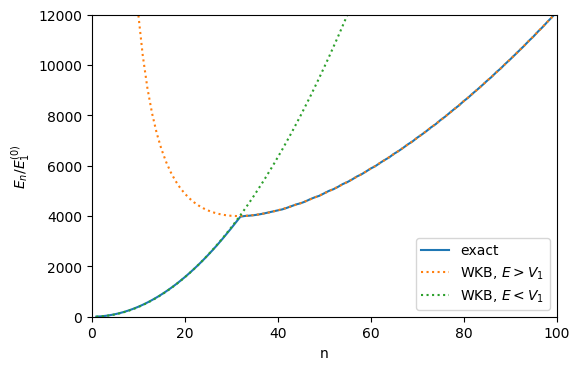

In [17]:
plt.figure(dpi=100)
plt.plot(index, eigenValues, label = 'exact')
plt.plot(index, e0, label = r'WKB, $E>V_1$', linestyle = 'dotted')
plt.plot(index, e0_sm, label = r'WKB, $E<V_1$', linestyle = 'dotted')
plt.xlim(0,100)
plt.ylim(0, 12000)
plt.ylabel(r'$E_n/E_1^{(0)}$')
plt.xlabel('n')
plt.legend()

The result almost overlapping, now zoom in.

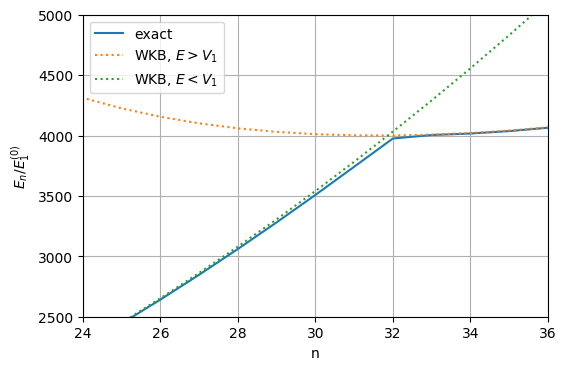

In [15]:
plt.figure(dpi=100)
plt.plot(index, eigenValues, label = 'exact')
plt.plot(index, e0, label = r'WKB, $E>V_1$', linestyle = 'dotted')
plt.plot(index, e0_sm, label = r'WKB, $E<V_1$', linestyle = 'dotted')
plt.xlim(24,36)
plt.ylim(2500, 5000)
plt.ylabel(r'$E_n/E_1^{(0)}$')
plt.xlabel('n')
plt.legend()
plt.grid()

# Q2. c) Compare
By using the code from assignment 8 calculate the energy for q=4.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la


def delta(m, n):
    if n == m:
        delta = 1
    else:
        delta = 0
    return delta
    

def j4(n):    
    if n == 0:
        return 1/80
    else:
        return (1+(-1)**n)/2*(1/(n*np.pi)**2 - 24/(n*np.pi)**4)
        
    
def fij(i, j):
    return j4(i-j) - j4(i+j)

def isw(s, size): #### infinite square well basis
    i = 0
    hij = np.zeros((size, size))
    while i < size:
        j = 0
        while j < size: 
            elem = (j+1)**2*delta(i+1, j+1) + np.pi**4*s**6*fij(i+1, j+1) 
            hij[i, j] = elem
            j = j+1
        i = i+1
           
    eigenValues, eigenVectors = la.eig(hij)
    eigenValues = np.real(eigenValues)
    
    index = np.linspace(0, size-1, size)
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return eigenValues, eigenVectors, index

es10, evs10, ns10 = isw(10, 1000)

/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


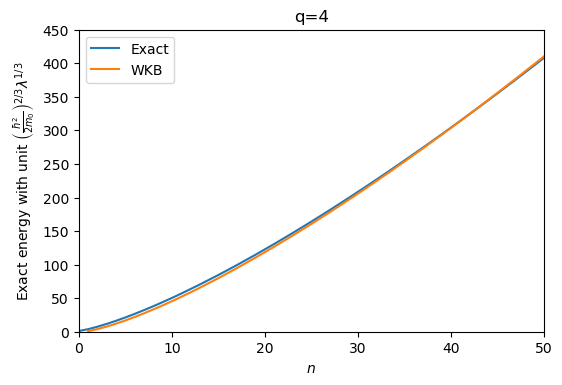

In [133]:
e4 = 1.113*3/(8)*np.pi**(2/3)*(2*ns10-1)**(4/3)

plt.figure(dpi=100)
plt.plot(ns10, es10/10**2, label = 'Exact')
plt.plot(ns10, e4, label = 'WKB')
plt.xlim(0, 50)
plt.ylim(0, 450)
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$')
plt.xlabel(r'$n$')
plt.title('q=4')
plt.legend()

In [124]:
def vij(m, n):
    if m==n:
        return 1 / 4 * ( 1- (4 / (np.pi*n) ** 2 * (1-(-1)**n)/2) )
    else:
        return 4 / np.pi**2 * ( (1+(-1)**(n+m)) /2) * ( (1-(-1)**((n-m))/2) / (n-m)**2 - (1-(-1)**((n+m)/2))/(n-m)**2)

def iswq1(lal, size): #### infinite square well basis
    i = 0
    hij = np.zeros((size, size))
    while i < size:
        j = 0
        while j < size: 
            elem = (j+1)**2*delta(i+1, j+1) + lal*vij(i+1, j+1)
            elem = np.real(elem)
            hij[i, j] = elem
            j = j+1
        i = i+1
           
    eigenValues, eigenVectors = la.eig(hij)
    eigenValues = np.real(eigenValues)
    
    index = np.linspace(1, size, size)
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return eigenValues, eigenVectors, index  

es1, evs1, ns1 = iswq1(15000, 1000)

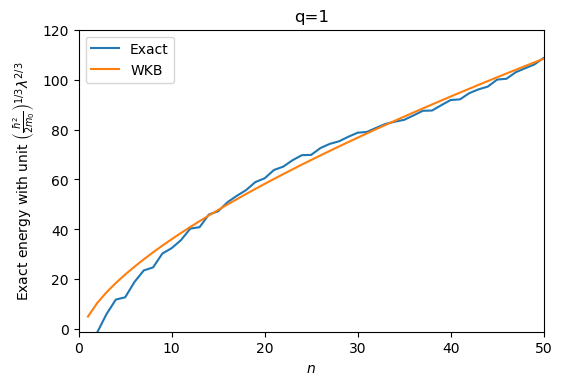

In [137]:
e1 = (np.pi*8/3)*3**(2/3)/2*np.pi**(1/3)*(ns1-1/2)**(2/3)/2**(2/3)
plt.figure(dpi=100)
plt.plot(ns1, 2*es1/np.sqrt(15000), label = 'Exact')
plt.plot(ns1, e1, label = 'WKB')
#plt.plot(ns10, e4, label = 'WKB')
plt.xlim(0, 50)
plt.ylim(-1, 120)
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{1 / 3} \lambda^{2/ 3}$')
plt.xlabel(r'$n$')
plt.title('q=1')
plt.legend()

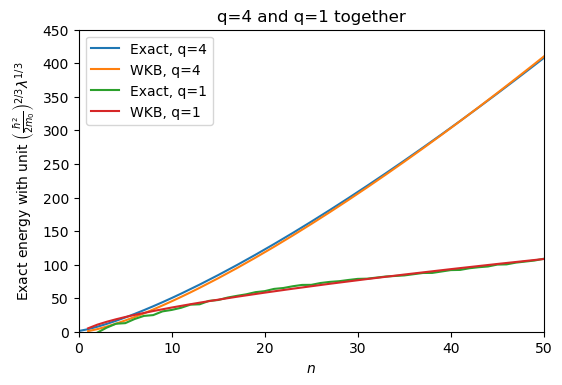

In [135]:
plt.figure(dpi=100)
plt.plot(ns10, es10/10**2, label = 'Exact, q=4')
plt.plot(ns10, e4, label = 'WKB, q=4')
plt.plot(ns1, 2*es1/np.sqrt(15000), label = 'Exact, q=1')
plt.plot(ns1, e1, label = 'WKB, q=1')
plt.xlim(0, 50)
plt.ylim(0, 450)
plt.ylabel(r'Exact energy with unit $\left(\frac{\hbar^{2}}{2 m_{0}}\right)^{2 / 3} \lambda^{1 / 3}$')
plt.xlabel(r'$n$')
plt.title('q=4 and q=1 together')
plt.legend()